# Problem Set 7: Backpropagation
# CMSC 422, Fall 2021
# Due Nov 18 at 11:59pm

<center>
<img src="https://miro.medium.com/max/1914/1*F9capAHwl_rz2-Q8z511WQ.jpeg" alt="meme" width="500px"/>
</center>

# Instructions
In this problem set you will implement backpropagation for a set of different neural network architectures.
There is some code provided for you here, and you will write your implementations in the places marked with __```#TODO: Your Code Here```__. You may add helper functions if you feel you need to.

__Analysis Questions:__ In addition to Python programming, each problem will contain some analysis questions (under __Analysis__). These are meant to ensure you understand your results, and will be manually graded on Gradescope.

__Submission:__ download this notebook as a `.ipynb` file and submit it to Gradescope. This assignment will be partially autograded so follow instructions closely.  
 
- Make sure your plots are visible when downloading the notebook, otherwise they won't appear on Gradescope. 
- Make sure your code cells are not throwing exceptions.
- Please do not import any packages other than what has already been imported here. You may be penalized for doing so.
- Lastly, the autograder times out after 40 minutes, so make sure your implementation is relativly efficient (e.g. by using numpy for matrix operations). Our implementation took a little over 10 minutes to test.

# Problems

## Problem 1 (25 Points)
We'll begin with the simplest possible network (a single layer perceptron). It has a single input feature that we call $x$. This is the activation of the single node of the input layer. This is connected to a single output node, which has a weight, $w$. We also have a bias term, so the activation of the output unit is $a = wx + b$. This network will be used to solve a linear regression problem. So, if we are given an input pair of $(x,y)$, we want to minimize the loss: 

$$L(x,y) = \frac{1}{1+e^{-(a-y)^2}} - \frac{1}{2}$$

To do this, you will need to randomly initialize the weight and bias and then perform gradient descent.
<br>
<br>
<center>
<img src="https://drive.google.com/thumbnail?id=1Qz8jJaPXbVzoL44Nd4nbQgFHOA8G_XyI&sz=w1000" alt="net1" width="150px"/>
<br>
<i>Figure 1: Network for Problem 1</i>
</center>
<br>
<br>
The gradient of the loss is computed using a training set containing pairs, $(x_1, y_1), (x_2, y_2), ... (x_n, y_n)$. We have:

$$\nabla L = \frac{1}{n} \sum_{i=1}^n \left( \frac{\partial L}{\partial w}(x_i, y_i), \frac{\partial L}{\partial b}(x_i, y_i)  \right)$$

If we denote $\theta = (w,b)$ as a vector containing all the parameters of the network, we perform gradient
descent with the update:

$$\theta^k = \theta^{k-1} - \eta \nabla L$$

Here $\eta$ is the learning rate, and $\theta^k$ denotes a vector of $(w,b)$ after the $k$'th iteration of gradient descent. Do not mistake $\eta$ (the learning rate) for $n$ (the number of data points).
We provide you with a routine to generate training data. This has the form: 

```simplest_training_data(n)```  
  
This just generates $n$ random training points on the line $y = 3x + 2$, with a little Gaussian noise added to the points.  
You need to write a routine with the form: 

```simplest_training(n, k, eta)```

Here $n$ indicates the number of points in the training set (you can call `simplest_training_data` to get the training data), $k$ indicates the total number of iterations that you will use in training, and $\eta$ is the learning rate.  To initialize the weights in your network, we suggest that you initialize $w$ with a Gaussian random variable with mean 0 and variance of 1, and that you initialize $b = 0$.  
You also need to write a routine of the form: 

```simplest_testing(theta, x)```

This routine applies the network, using the parameters in theta, to the input values in the vector $x$, and returns a vector of results in $y$.
After training, the network should learn $w$ and $b$ values that are similar to those used to train the network.  So you can test your network by looking at the learned $w$ and $b$ values.  Or you can use the testing algorithm to see if the network computes appropriate $y$ values.  In testing, you may find that if you use too big a value for $\eta$ the network will not converge to anything meaningful.  If you use a value of $k$ that is too small, it won't have time to converge to a good solution.
We run our algorithm with $n = 30, k = 10000, \eta = .02$.   When we test using $x = (0, 1, ..., 9)$ we get the result:
  
```
1.99107688  4.91908171  7.84708654 10.77509137 13.7030962  16.63110103 19.55910586 22.48711069 25.41511552 28.34312035
```

These points fit the line $y = 3x + 2$.

In [19]:
import numpy as np
import math as m
import sys
import random
from statistics import mean

###Problem 1
###Provided function to create training data
def simplest_training_data(n): # Do NOT edit this function: simplest_training_data(n)!
    m = 3
    b = 2
    x = np.random.uniform(0,1,n)
    y = m*x+b+0.3*np.random.normal(0,1,n)
    return (x,y)

def simplest_training(n, k, eta):
  np.random.seed(0)
  # TODO: implement this method.
  # Perform gradient descent k times with learning rate eta
  # and n training data points.
  # theta contains the learned parameters after training.

  # initialize the variables and data
  w = random.gauss(0,1)
  b = 0
  (x0, y0) = simplest_training_data(n)
  for i in range(k):
    (dw, db) = gradient_loss(w, x0, b, y0)
    (w_new, b_new) = (w-eta*dw, b-eta*db)
    (w, b) = (w_new, b_new)

  theta = (w_new, b_new)
  return theta 


def simplest_testing(theta, x):
  # TODO: implement this method.
  # Use the learned theta to classify given test data x.
  # y stores the list of labels predicted by the model corresponding to each data in x.
  y = []
  (w, b) = theta

  for xi in x:
    y.append(w*xi+b)

  return y

def simplest_loss(theta, x):
  # TODO: implement this method for finding average loss
  # Compute the average loss (use the loss function given in the question)
  # for data points in x using theta.
  # Return loss, a scalar value.
  n = len(x)
  y = simplest_testing(theta, x)
  loss_ret = []

  for i in range(n):
    L = (1+m.exp(-(3*x[i]+2-y[i]))**2)**(-1)-1/2
    loss_ret.append(L)
  
  loss = mean(loss_ret)
  return loss

def deriv_scaler(w, xi, b, yi):
  first = -(1+m.exp(-(w*xi+b-yi)**(2)))**(-2)
  second = m.exp(-(w*xi+b-yi)**(2))
  third = -2*(w*xi+b-yi)
  return first*second*third

def gradient_loss(w, x, b, y):
  n = len(x)
  w_ret = []
  b_ret = []
  for i in range(n):
    dw = deriv_scaler(w,x[i],b,y[i])*x[i]
    db = deriv_scaler(w,x[i],b,y[i])
    w_ret.append(dw)
    b_ret.append(db)
  return (mean(w_ret), mean(b_ret))

In [20]:
theta = simplest_training(30, 10000, 0.000002)
print(theta)
x = [0,1,2,3,4,5,6,7,8,9]
print(simplest_loss(theta, x))

(-1.3454366328178722, 0.00011422862119231614)
0.49820066741086577


### Analysis (10 Points)
Answer the following questions (a - e):

a) What is the average loss for test data for $x = (0, 1, ..., 9)$ using model
with $n = 30, k = 10000, \eta = 0.02$? (Only write the float value below)

b) What is the average loss for test data for $x = (0, 1, ..., 9)$ using model
with $n = 2, k = 10000, \eta = 0.02$? (Only write the float value below)

c) What is the average loss for test data for $x = (0, 1, ..., 9)$ using model
with $n = 30, k = 100, \eta = 5$? (Only write the float value below)

d) What is the average loss for test data for $x = (0, 1, ..., 9)$ using model
with $n = 30, k = 10000, \eta = 0.000002$? (Only write the float value below)

e) Are the average loss values you get in each cases above (b-d) differ from that (a)? Why? **(Explain in less than 50 words. You will be penalized if the answer exceeds the word limit.)**

\\


- !!! _YOUR RESPONSE HERE_ !!!

**a) 0.22819781696473718**

**b) 0.4980285114750154**

**c) 0.25608297009678727**

**d) 0.4982006215855819**

**e) (a) vs. (b): more sample for training = less loss; (a) vs. (c): more iteration = less loss and $\eta$ doesn't affect much here; (a) vs. (d): too little $\eta$ leads to more loss, as it converge too slowly.**




## Problem 2 (35 Points)
You will now create a network that is a little more complicated. It still contains just an input and an output layer, with no hidden layers. But it now has a nonlinearity along with a cross-entropy loss, so that we can use it for classification.
<br>
<br>
<center>
<img src="https://drive.google.com/thumbnail?id=1UkNx6-HghYRsjrXbqB6jN04VUsA-_RKp&sz=w1000" alt="net2" width="400px"/>
<br>
<i>Figure 2: Network for Problem 2</i>
</center>
<br>

The network has two inputs, $x_1$ and $x_2$.  These are connected with two weights to a single output unit.  If we let $z = w_1x_1 + w_2x_2 + b$, the output unit will have an activation of $a = \sigma(z)$, where $\sigma(z)$ represents the sigmoid function:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

We can interpret the output as giving the probability that the input belongs to class 1. If the probability is low, then the input probably belongs to class 0. Hint: the derivative of the sigmoid is given by:

$$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z))$$

In training the network, you will use the cross-entropy loss. In this case, the cross entropy loss will be:

$$L_{CE}(x,y) = -(y\log{a} + (1-y)\log{(1-a)})$$

If $y = 1$, this is just the negative log of what the network predicts for the probability that the input belongs to class 1.  If $y = 0$, it is the negative log of the probability that the input belongs to class 0.
We provide you with a routine to generate training data. This has the form:

```single_layer_training_data(trainset)```  
    
which returns $X$ and $y$.
This provides two different training sets.  When the input, trainset, is 1, the function produces a simple, linearly separable training set.  Half the points are near $(0,0)$ and half are near $(10,10)$.  $X$ is a matrix in which each row contains one of these points, so it is $n \times 2$, where $n$ is the number of points.  $y$ is a vector of class labels, which have the value 1 for the points near $(0,0)$ and 0 for the points near $(10,10)$.

When trainset is 2, we generate a different training set that is not linearly separable, but that corresponds to the Xor problem.  Points from class 1 are either near $(0,0)$ or $(10,10)$, while points in class 0 are near either $(10,0)$ or $(0,10)$.

You will need to implement two routines.  
The first is: 

```single_layer_training(k, eta, trainset)```  
  
As before, $k$ will indicate the number of iterations of gradient descent and eta gives the learning rate.  trainset indicates which training set to use, 1 or 2.  You will train the network using the same gradient descent approach as in the previous problem.  As before, we suggest that you initialize weights using random values chosen from a Gaussian distribution with zero mean, and that you initialize bias at 0.  

You will also implement a test routine: 

```single_layer_testing(theta, X)```  
  
This takes in the network parameters and a matrix, $X$, of the form returned by single\_layer\_training\_data.  It returns a vector of the output values the network computes.

__Remember__: The `trainset` argument is the integer to be used to generate data with `single_layer_training_data(trainset)`, it is NOT the training dataset.

In [21]:
###Problem 2
###Provided function to create training data
def single_layer_training_data(trainset):
    n = 10
    if trainset == 1:
    # Linearly separable
        X = np.concatenate((np.random.normal((0,0),1,(n,2)), np.random.normal((10,10),1,(n,2))),axis=0)
        y = np.concatenate((np.ones(n), np.zeros(n)),axis=0)

    elif trainset == 2:
        # Not Linearly Separable
        X = np.concatenate((np.random.normal((0,0),1,(n,2)), np.random.normal((10,10),1,(n,2)), np.random.normal((10,0),1,(n,2)), np.random.normal((0,10),1,(n,2))),axis=0)
        y = np.concatenate((np.ones(2*n), np.zeros(2*n)), axis=0)

    else:
        print ("function single_layer_training_data undefined for input", trainset)
        sys.exit()
    return (X,y)

def single_layer_training(k, eta, trainset):
  #TODO: Your Code Here
  w = [random.gauss(0,1), random.gauss(0,1)]
  b = 0
  (X0, y0) = single_layer_training_data(trainset)

  for i in range(k):
    w_new, b_new = train_2(eta, X0, y0, w, b)
    w, b = w_new, b_new
  theta = (w, b)
  return theta

def single_layer_testing(theta, X):
  #TODO: Your Code Here
  (w, b) = theta
  z = sigmoid(np.dot(X, w) + b)
  return z

def forward_2(w, b, xi):
  z = sigmoid(np.dot(xi, w) + b)
  return z

def backprop_2(xi, yi, z, w, b, eta):
  error = yi - z
  delta = error * sigmoid(z)*(1-sigmoid(z)) * eta
  w += np.dot(xi.T, delta)
  b += error*sigmoid(z)*eta
  return w, b

def train_2(eta, X, y, w, b):
  n = len(X)
  for i in range(n):
    z = forward_2(w, b, X[i])
    w, b = backprop_2(X[i], y[i], z, w, b, eta)
  return w, b

def sigmoid(z):
  return 1/(1+np.exp(-z))

### Analysis (10 Points)
Do not use the data you used to train the network, call `single_layer_training_data` again to get fresh data for testing. Answer the following questions in this cell:

a) What is the value of theta when k = 10000, $\eta$=0.01, for trainset = 1? 

b) Plot a figure for datapoints and the linearly separator the algorithm calculated under the condition in a).

c) What is the value of theta when k = 10000, $\eta$=0.0001, for trainset = 2? 

d) Plot a figure for datapoints and the linearly separator the algorithm calculated under the condition in c).

e) When trainset = 1, your network should assign a high probability of belonging to class 1 for points near $(0,0)$, and a low probability for points near $(10,10)$.  When trainset = 2, the data is not linearly separable, so you may find that your network has problems being able to separate. Use sample network outputs to describe what happens for the two trainsets. **(Explain in less than 50 words. You will be penalized if the answer exceeds the word limit.)**


!!! _YOUR RESPONSE HERE_ !!!
- the following output is in the form of ([w1, w2], b)
- **a) (array([-0.73841042, -1.07817158]), 6.639204151436298)**
- **c) (array([-0.00371366, -0.00709988]), 0.03758684049994358)**
- **trainset = 1: w started from random gaussian with mean=0 and would stop updating as soon as the dataset is linear sepatated. So it would close to 0.**
- **trainset = 2: $\eta$ is too small and would jump back and forth because of the Xor.**

In [22]:
theta = single_layer_training(10000, 0.01, 1)
print(theta)
(X,y) = single_layer_training_data(1)

(array([-0.5763758 , -1.11754333]), 6.360247147711676)


Text(0.5, 1.0, 'Problem 2(b)')

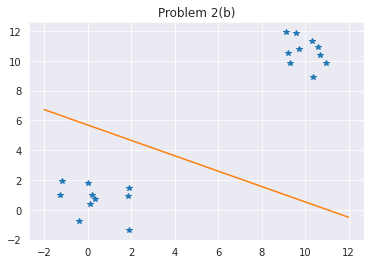

In [23]:
X1 = []
X2 = [] 
for i in X:
  X1.append(i[0])
  X2.append(i[1])
([w1, w2], b) = theta

import matplotlib.pyplot as plt
plt.plot(X1, X2, '*')
x = np.linspace(-2,12,100)
y = (-w1/w2)*x-(b/w2)
plt.plot(x, y)
plt.title("Problem 2(b)")

In [24]:
theta = single_layer_training(10000, 0.0001, 2)
print(theta)
(X,y) = single_layer_training_data(2)

(array([-0.01116073,  0.01421513]), -0.01183028828882523)


Text(0.5, 1.0, 'Problem 2(d)')

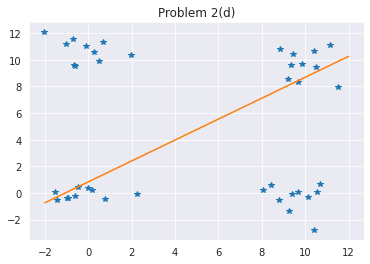

In [25]:
X1 = []
X2 = []
for i in X:
  X1.append(i[0])
  X2.append(i[1])
([w1, w2], b) = theta

import matplotlib.pyplot as plt
plt.plot(X1, X2, '*')
x = np.linspace(-2,12,100)
y = (-w1/w2)*x-(b/w2)
plt.plot(x, y)
plt.title("Problem 2(d)")

## Problem 3 (40 Points)
<center>
<img src="https://drive.google.com/thumbnail?id=1lZQ1CnQUDD-kiyL-FtDu0UTO1dmEy-Oq&sz=w1000" alt="net3" width="400px"/>
<br>
<i>Figure 3: Network for Problem 3</i>
</center>
<br>
<br>
Now you will implement a multi-layer network that has a hidden layer.  To start with a relatively simple case, we will do this without any non-linearities. The network has two input units, $x_1$ and $x_2$.  These are connected to a single hidden unit.  We'll call the activation of this hidden unit $h$, so $h = w_{11}x_1 + w_{12}x_2 + b_{11}$.  This hidden unit is connected to two output units.  We'll call their activation $z_1$ and $z_2$, so we have:

$$z_1 = w_{21}h + b_{21}~~~~~~~~~~~z_2 = w_{22}h + b_{22}$$

To train this network, we use a loss function that says that we want the output to be close to the input.  So the loss function is:  
  
$$L(x_1, x_2) = (z_1 - x_1)^2 + (z_2 - x_2)^2$$
    
That is, the input is also acting as the label.  This kind of network is called an **auto-encoder**.  You may be wondering what the point of this is.  Because the hidden layer is smaller than the input and output layers, the network is forced to learn low-dimensional representation of the data.  In this case, the network learns to map the input points onto a line in the hidden layer, and then compute the 2D coordinates of the points on this line for the output layer.  This process is called Principal Component Analysis (PCA).

We will provide a routine to generate training data:

```pca_training_data(n, sigma)```  
  
The input parameter $n$ indicates the number of points in the training set.  As in the last problem, $X$ contains a $n \times 2$ matrix in which each row contains the coordinates of a 2D point.  These points are generated to lie along the line $y = x + 1$.  Then Gaussian noise is added to the points, with zero mean and a standard deviation of sigma.

Once again, you will implement training and testing routines.  
  
`pca_training(k, eta, n, sigma)`  
  
The input $k$ gives the number of iterations of gradient descent to use, while $eta$ gives the learning rate.  The input value $n$ indicates the number of points in the training set, while $sigma$ indicates the amount of noise added to these points.  Use these as parameters to pca\_training\_data.  The routine returns theta, a representation of all the weights and biases in the network.
Also implement a test routine: 

```pca_test(theta, X)```  
  
$X$ will contain test data in the form returned by pca\_training\_data.  $Z$ provides the results the network produces given this input; $Z$ has the same format as $X$.  

To test this, try training the network with $n = 10$ and $sigma = .1$.  Then test, using the input: `pca_test(theta, [[1,2], [4,5], [10, 3]])`.  
  
When I run my  code with this test I get: `[[0.9418, 2.0653], [3.9543, 5.0511], [6.1780, 7.2551]]`.  



In [26]:
###Problem 3
###Provided function to create training data
def pca_training_data(n, sigma):
    m = 1
    b = 1
    x1 = np.random.uniform(0,10,n)
    x2 = m*x1+b
    X = np.c_[x1, x2]
    X += np.random.normal(0, sigma, X.shape)
    return X

def pca_training(k, eta, n, sigma):
    #TODO: Your Code Here
    w1 = np.array([random.gauss(0,1), random.gauss(0,1)])
    w2 = np.array([random.gauss(0,1), random.gauss(0,1)])
    b = 0
    b2 = np.array([0, 0])
    X = pca_training_data(n, sigma)

    for i in range(k):
      w1_new, w2_new, b_new, b2_new = train_3(w1, w2, b, b2, X, eta)
      w1, w2, b, b2 = w1_new, w2_new, b_new, b2_new
    theta = (w1, w2, b, b2)
    return theta

def pca_test(theta, X):
    #TODO: Your Code Here
    (w1, w2, b, b2) = theta
    [w11, w12] = w1
    [w21, w22] = w2
    [b21, b22] = b2
    Z = []

    for xi in X:
      (x1, x2) = xi
      h = w11*x1+w12*x2+b
      z1 = w21*h+b21
      z2 = w22*h+b22
      Z.append([z1, z2])

    return Z

def hidden_3(w1, b, xi):
  [w11, w12] = w1
  [x1, x2] = xi
  h = w11*x1+w12*x2+b
  return h

def forward_3(w1, w2, b, b2, xi):
  [x1, x2] = xi
  [w11, w12] = w1
  [w21, w22] = w2
  [b21, b22] = b2

  hi = hidden_3(w1, b, xi)
  z1 = w21*hi+b21
  z2 = w22*hi+b22
  return [z1, z2]

def gradient_loss_3(xi, zi, w1, w2, b):
  [x1, x2] = xi
  [z1, z2] = zi
  [w11, w12] = w1
  [w21, w22] = w2

  h = w11*x1+w12*x2+b
  dw11 = 2*(z1-x1)*w21*x1 + 2*(z2-x2)*w22*x1
  dw12 = 2*(z1-x1)*w21*x2 + 2*(z2-x2)*w22*x2
  dw21 = 2*(z1-x1)*h
  dw22 = 2*(z2-x2)*h
  db = 2*(z1-x1)*w21 + 2*(z2-x2)*w22
  db21 = 2*(z1-x1)
  db22 = 2*(z2-x2)

  return [dw11, dw12], [dw21, dw22], db, [db21, db22]

def backprop_3(w1, w2, b, b2, xi, eta):
  [x1, x2] = xi
  [w11, w12] = w1
  [w21, w22] = w2
  [b21, b22] = b2

  zi = forward_3(w1, w2, b, b2, xi)
  [delta_w11, delta_w12], [delta_w21, delta_w22], delta_b, [delta_b21, delta_b22] = gradient_loss_3(xi, zi, w1, w2, b)
  w11_new = w11 - eta*delta_w11
  w12_new = w12 - eta*delta_w12
  w21_new = w21 - eta*delta_w21
  w22_new = w22 - eta*delta_w22
  b_new = b - eta*delta_b
  b21_new = b21 - eta*delta_b21
  b22_new = b22 - eta*delta_b22
  return [w11_new, w12_new], [w21_new, w22_new], b_new, [b21_new, b22_new]

def train_3(w1, w2, b, b2, X, eta):
  n = len(X)
  for i in range(n):
    zi = forward_3(w1, w2, b, b2, X[i])
    w1, w2, b, b2 = backprop_3(w1, w2, b, b2, X[i], eta)
  return w1, w2, b, b2



In [27]:
theta1 = pca_training(300, 0.0001, 10, 0.1)
# print(theta)
X = [[1,2], [4,5], [10, 3]]
print(pca_test(theta1, X))

theta2 = pca_training(300, 0.0001, 10, 0)
print(pca_test(theta2, X))

[[2.0073575541421533, 2.2670105167061534], [4.541653527687778, 5.147452028236985], [0.9540519732345343, 1.0698397240111375]]
[[1.2933832215863224, 1.795974371427559], [4.138164095647702, 4.904532422237686], [5.290603165978267, 6.163829327250173]]


### Analysis (10 Points)
It may take a little work to find good values for $k$ and $\eta$.  Add a description of your experimental results inside this cell.  

a) Can you explain why the network produces the point $(6.1780, 7.2551)$ with an input of $(10, 3)$? **(Explain in less than 30 words. You will be penalized if the answer exceeds the word limit.)**

b) Do another test with $sigma = 0$ instead of $sigma = .1$.  Run your network with the same test data.  How have the results changed?  Can you explain this change? **(Explain in less than 30 words. You will be penalized if the answer exceeds the word limit.)**

\\

- !!! _YOUR RESPONSE HERE_ !!!

**a) The training follow the order of input, which means it will fit better to (1,2), (4,5). And it's likely to care more on the difference and summation of the two inputs.**

- Output for sigma= .1
- [[2.050895889464059, 2.020945695728913], [4.490924819978479, 5.016365808773104], [4.868753747075665, 5.480194886110404]]
- Output for sigma = 0
- [[1.299227373982601, 1.7967637598367587], [4.125322719428179, 4.915310489123544], [6.752073080287472, 7.81388351841357]]

**b) It changed, closer to the correct output. The standard deviation for random training data is less, leaving less freedom to the randomization, which means more concentrated to the input.**

## Problem 4 (optional challenge problem, for extra credit, 20 points):
Ok, now you are ready to create a complete, fully connected neural net with a hidden layer and non-linearities. You will use this network to solve the XOR problem, using the same training data as in Problem 2. Your network architecture should have the following components:
- Two input units, with activations $x_1$ and $x_2$.  These are just the coordinates of 2D points.
- A variable number of hidden units, H.  Write your code so that you can select the number of hidden units as a hyperparameter.  Let's call the activation of the $i$'th hidden unit, $a^1_i$.  Let's call the weights of these units $w^1_{ij}$.  This is the weight from input unit $j$ to hidden unit $i$.  
- Use a RELU non-linearity for the hidden units.  So to determine the activation of a hidden unit we have: $z^1_i = w^1_{i1}x_1 + w^1_{i2}x_2 + b^1_i$, and $a^1_i = max(0, z^1_i)$.
- There is then a single output unit.  Call its activation $a^2$.  We compute this as: $z^2 = \left( \sum_{i=1}^H w^2_{1i}a^1_i \right) + b^2$, and $a^2 = \sigma(z^2)$, where $\sigma$ is the sigmoid nonlinearity.  This last part is just the same as in Problem 2.  And, like Problem 2, you can train your network using the cross-entropy loss.

<center>
<img src="https://drive.google.com/thumbnail?id=1qfLXZJsDFIwTfIdHxEP6HnJBmUrPGZsT&sz=w1000" alt="net3" width="400px"/>
<br>
<i>Figure 4: Network for Problem 4</i>
</center>
<br>
<br>

Implement test and training functions with the templates:

`nn_training(k, eta, trainset, H)`

`nn_testing(theta, X)`

The parameters to the training routine are similar to those in Problem 2, with $H$ indicating the number of hidden units.  The testing routine has the same form as in Problem 2.

__Remember__: The `trainset` argument is the integer to be used to generate data with `single_layer_training_data(trainset)`, it is not the actual training dataset.

In [28]:
# ###Problem 4: Challenge Problem
# def nn_training(k, eta, trainset, H):
#     #TODO: Your Code Here
#     w1 = np.full((H, 2), random.gauss(0,1))
#     w2 = np.full((H, 1), random.gauss(0,1))
#     b1 = 0
#     b2 = 0
#     (X, y) = single_layer_training_data(trainset)

#     for i in range(k):
#       w1_new, w2_new, b1_new, b2_new = train_4(X, y, w1, w2, b1, b2, eta)
#       w1, w2, b1, b2 = w1_new, w2_new, b1_new, b2_new
#     theta = (w1, w2, b1, b2)
#     return theta

# def nn_testing(theta, X):
#     #TODO: Your Code Here
#     (w1, w2, b1, b2) = theta
#     y = []
#     for Xi in X:
#       Z1 = np.dot(Xi, w1.T) + b1
#       a1 = ReLU(Z1)
#       Z2 = np.dot(a1.T, w2) + b2 
#       a2 = Sigmoid(Z2)
#       y.append(a2[0])
#     return y


# def forward_4(w1, w2, b1, b2, Xi):
#   # [w1, w2] = w
#   # [b1, b2] = b

#   # print("w1: ", w1.shape)
#   # print("w2: ", w2.shape)
#   # print("b1: ", b1)
#   # print("b2: ", b2)
#   # print("Xi: ", Xi.shape)
#   Z1 = np.dot(Xi, w1.T) + b1
#   a1 = ReLU(Z1)
#   # print("a1: ", a1)
#   Z2 = np.dot(a1.T, w2) + b2 
#   # print("Z2: ", Z2)
#   a2 = Sigmoid(Z2)
#   # print("a2: ", a2)
#   return [a1, a2]

# def backprop_4(Xi, yi, a, w1, w2, b1, b2, eta):
#   [a1, a2] = a
#   # print("w1: ", w1)
#   # print("w2: ", w2)
#   # print("b1: ", b1)
#   # print("b2: ", b2)
#   # aaaaa = np.array([a1])
#   # print("a1: ", aaaaa.T)
#   # [w1, w2] = w
#   # [b1, b2] = b

#   error = yi - a2 
#   # print("error: ", error)
#   delta2 = error * Sigmoid(a2)*(1-Sigmoid(a2)) * eta
#   # print("delta2: ", delta2)
#   w2 += np.dot(np.array([a1]).T, np.array([delta2]))
#   # print("w2: ", w2)
#   b2 += error * Sigmoid(a2) * eta
#   # print("b2: ", b2)

#   for i in range(len(a1)):
#     # print("a: ", a1[i])
#     if a1[i] != 0:
#       # print("w1: ", w1[i])
#       # print("Xi: ", Xi)
#       # print(np.dot(np.array([Xi]).T, np.array([delta2])).T)
#       delta1 = np.dot(np.array([Xi]).T, np.array([delta2])).T
#       w1[i] += delta1[0]
#       b1 += error * Sigmoid(a2) * eta

#   return w1, w2, b1, b2

# def train_4(X, y, w1, w2, b1, b2, eta):
#   # [w1, w2] = w
#   # [b1, b2] = b

#   n = len(X)
#   for i in range(n):
#     a = forward_4(w1, w2, b1, b2, X[i])
#     w1, w2, b1, b2 = backprop_4(X[i], y[i], a, w1, w2, b1, b2, eta)
#   return w1, w2, b1, b2

# def Sigmoid(z):
#   return 1/(1+np.exp(-z))

# def ReLU(Z):
#   a = []
#   for z in Z:
#     if z > 0:
#       a.append(z)
#     else:
#       a.append(0)
#   return np.array(a)


In [29]:
# theta = nn_training(1000, 0.1, 2, 4)
# # print(theta)
# (X, y) = single_layer_training_data(2)
# print("X: ", X)
# print("y: ", y)
# y = nn_testing(theta, X)
# print(y)

In [30]:
# X1 = []
# X2 = [] 
# for i in X:
#   X1.append(i[0])
#   X2.append(i[1])
# (w1, w2, b1, b2) = theta

# import matplotlib.pyplot as plt
# plt.plot(X1, X2, '*')
# x = np.linspace(-2,12,100)
# y = nn_testing(theta, X)
# plt.plot(x, y)
# plt.title("Problem 2(b)")

In [31]:
# class MLP:
#     """
#     Create a multi-layer perceptron.

#     train_data: A 4x2 matrix with the input data.

#     target: A 4x1 matrix with expected outputs

#     lr: the learning rate. Defaults to 0.1

#     num_epochs: the number of times the training data goes through the model
#         while training

#     num_input: the number of nodes in the input layer of the MLP.
#         Should be equal to the second dimension of train_data.
    
#     num_hidden: the number of nodes in the hidden layer of the MLP.

#     num_output: the number of nodes in the output layer of the MLP.
#         Should be equal to the second dimension of target.
#     """
#     def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
#         self.train_data = train_data
#         self.target = target
#         self.lr = lr
#         self.num_epochs = num_epochs

#         # initialize both sets of weights and biases randomly
#             # - weights_01: weights between input and hidden layer
#             # - weights_12: weights between hidden and output layer
#         self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
#         self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

#         # - b01: biases for the  hidden layer
#         # - b12: bias for the output layer
#         self.b01 = np.random.uniform(size=(1,num_hidden))
#         self.b12 = np.random.uniform(size=(1,num_output))

#         self.losses = []

#     def update_weights(self):
        
#         # Calculate the squared error
#         loss = 0.5 * (self.target - self.output_final) ** 2
#         print(loss)
#         self.losses.append(np.sum(loss))

#         error_term = (self.target - self.output_final)

#         # the gradient for the hidden layer weights
#         grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))
#         print("grad01: ", grad01)
#         print(grad01.shape)

#         # the gradient for the output layer weights
#         grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))

#         print("grad12: ", grad12)
#         print(grad12.shape)

#         # updating the weights by the learning rate times their gradient
#         self.weights_01 += self.lr * grad01
#         self.weights_12 += self.lr * grad12

#         # update the biases the same way
#         self.b01 += np.sum(self.lr * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
#         self.b12 += np.sum(self.lr * error_term * self._delsigmoid(self.output_final), axis=0)

#     def _sigmoid(self, x):
#         """
#         The sigmoid activation function.
#         """
#         return 1 / (1 + np.exp(-x))

#     def _delsigmoid(self, x):
#         """
#         The first derivative of the sigmoid function wrt x
#         """
#         return x * (1 - x)

#     def forward(self, batch):
#         """
#         A single forward pass through the network.
#         Implementation of wX + b
#         """

#         self.hidden_ = np.dot(batch, self.weights_01) + self.b01
#         self.hidden_out = self._sigmoid(self.hidden_)

#         self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
#         self.output_final = self._sigmoid(self.output_)

#         return self.output_final

#     def classify(self, datapoint):
#         """
#         Return the class to which a datapoint belongs based on
#         the perceptron's output for that point.
#         """
#         datapoint = np.transpose(datapoint)
#         if self.forward(datapoint) >= 0.5:
#             return 1

#         return 0

#     def plot(self, h=0.01):
#         """
#         Generate plot of input data and decision boundary.
#         """
#         # setting plot properties like size, theme and axis limits
#         sns.set_style('darkgrid')
#         plt.figure(figsize=(20, 20))

#         plt.axis('scaled')
#         plt.xlim(-0.1, 1.1)
#         plt.ylim(-0.1, 1.1)

#         colors = {
#             0: "ro",
#             1: "go"
#         }

#         # plotting the four datapoints
#         for i in range(len(self.train_data)):
#             plt.plot([self.train_data[i][0]],
#                      [self.train_data[i][1]],
#                      colors[self.target[i][0]],
#                      markersize=20)

#         x_range = np.arange(-0.1, 1.1, h)
#         y_range = np.arange(-0.1, 1.1, h)

#         # creating a mesh to plot decision boundary
#         xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
#         Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

#         # using the contourf function to create the plot
#         plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

#     def train(self):
#         """
#         Train an MLP. Runs through the data num_epochs number of times.
#         A forward pass is done first, followed by a backward pass (backpropagation)
#         where the networks parameter's are updated.
#         """
#         for _ in range(self.num_epochs):
#             self.forward(self.train_data)
#             self.update_weights()
            

In [48]:
###Problem 4: Challenge Problem
def nn_training(k, eta, trainset, H):
    #TODO: Your Code Here
    (X, y) = single_layer_training_data(trainset)
    w1 = np.random.uniform(size=(2, H))
    w2 = np.random.uniform(size=(H, 1))
    b1 = np.random.uniform(size=(1,H))
    b2 = np.random.uniform(size=(1,1))

    for n in range(k):
      for i in range(len(X)):
        a1, a2 = forward_4(X[i], w1, w2, b1, b2)
        w1, w2, b1, b2 = backprop_4(X[i], y[i], a1, a2, w1, w2, b1, b2, eta)
    
    theta = (w1, w2, b1, b2)
    return theta

def nn_testing(theta, X):
    #TODO: Your Code Here
    (w1, w2, b1, b2) = theta
    y = []
    for i in range(len(X)):
      Z1 = np.dot(X[i], w1) + b1
      a1 = ReLU(Z1)
      Z2 = np.dot(a1, w2) + b2
      a2 = Sigmoid(Z2)
      y.append(a2[0][0])
    return y

def Sigmoid(z):
  return 1/(1+np.exp(-z))

def Sigmoid_deriv(z):
  return z*(1-z)

def ReLU(Z):
  a = []
  for z in Z[0]:
    if z > 0:
      a.append(z)
    else:
      a.append(0)
  return np.array([a])

def forward_4(Xi, w1, w2, b1, b2):
  Z1 = np.dot(Xi, w1) + b1
  # Z1 = Z1[0]
  # print(Z1)
  a1 = ReLU(Z1)
  # print(a1)
  Z2 = np.dot(a1, w2) + b2
  # Z2 = Z2[0]
  # print(Z2) 
  a2 = Sigmoid(Z2)
  # print(a2)
  return a1, a2

# def classify(data, theta):
#   data = np.transpose(data)
#   (w1, w2, b1, b2) = theta
#   a1, a2 = forward_4(data, w1, w2, b1, b2)
#   if a2 >= 0.5:
#     return 1
#   return 0

def backprop_4(Xi, yi, a1, a2, w1, w2, b1, b2, eta):
  error = yi - a2
  # print(a1)
  # print("w1: ", w1)
  # print("b1: ", b1)
  # print("w2: ", w2)
  # print("b2: ", b2)
  # print(a1.T)
  Xi = np.array([Xi])
  # print(Xi)
  delta2 = a1.T @ (error * Sigmoid_deriv(a2))
  # print("delta2: ", delta2)
  delta1 = Xi.T @ (error * Sigmoid_deriv(a2))
  # print("delta1: ", delta1)

  w2 += eta * delta2
  b2 += np.sum(eta * error * Sigmoid_deriv(a2), axis=0)
  w1 += eta * delta1
  b1 += np.sum(eta * error * Sigmoid_deriv(a2), axis=0)
  # for i in range(len(a1[0])):
  #   if a1[0][i] != 0:
  #     w1[i] += eta * delta1
  #     b1[i] += np.sum(eta * error * Sigmoid_deriv(a2), axis=0)

  return w1, w2, b1, b2

# import seaborn as sns
# def plot(X, y, theta):
#   sns.set_style('darkgrid')
#   plt.figure(figsize=(20, 20))
#   plt.axis('scaled')
#   plt.xlim(-0.1, 1.1)
#   plt.ylim(-0.1, 1.1)

#   colors = {
#       0: "ro",
#       1: "go"
#   }

#   for i in range(len(X)):
#     plt.plot(X[i][0], X[i][1], colors[y[i]], markersize=20)

#   x_range = np.arange(-0.1, 1.1, 0.01)
#   y_range = np.arange(-0.1, 1.1, 0.01)
#   xx, yy = np.meshgrid(x_range, y_range, indexing = 'ij')
#   Z = np.array([[classify([x, y], theta) for x in x_range] for y in y_range])
#   plt.contour(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

In [49]:
theta = nn_training(100, 0.1, 2, 4)
print(theta)
(X, y) = single_layer_training_data(2)
y = nn_testing(theta, X)
print(y)
# plot(X,y, theta)

(array([[ 46.88509994,  46.58661916,  46.65662038,  46.43618602],
       [-49.95696966, -50.41249108, -49.66203798, -49.77806597]]), array([[1.35313515],
       [0.59476766],
       [0.23298027],
       [0.06212127]]), array([[ 0.51560394,  0.33227936, -0.28228121,  0.10408065]]), array([[-0.03483761]]))
[0.9676763001633969, 0.491291477386099, 0.9999998728340602, 1.0, 0.491291477386099, 0.491291477386099, 1.0, 0.491291477386099, 0.491291477386099, 1.0, 0.491291477386099, 0.491291477386099, 1.0, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.9999999999991556, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099, 0.491291477386099]


In [34]:
# ###Problem 4: Challenge Problem
# def nn_training(k, eta, trainset, H):
#     #TODO: Your Code Here
#     return theta

# def nn_testing(theta, X):
#     #TODO: Your Code Here
#     return y

### Analysis (5 Points)
Run experiments to demonstrate that your network can solve the XOR problem. How do you find the results vary as you vary the number of hidden units?  Show and discuss the results of your experiments inside/below this cell.

- !!! _YOUR RESPONSE HERE_ !!!